In [1]:
# 参考
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.67, 0.86, 0.09, 0.8, 0.5, 0.19, 0.88, 0.81]

In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.0
        self.N = 0.0
    
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj)
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    total_plays = 0.0
    
    for init_b in bandits:
        x = init_b.pull()
        total_plays += 1
        init_b.update(x)
    
    for i in range(NUM_TRIALS):

        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        total_plays += 1
        


    ## print mean estimates for each bandit
    print('~'*10, 'print estimates', '~'*10)
    for b in bandits:
        print("mean estimate:", b.p_estimate, 'actual prob', b.p)
        
    # print total reward
    print('~'*10, 'print total reward', '~'*10)
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
      
    ## plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()
    
    return win_rates

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.6858237547892719 actual prob 0.67
mean estimate: 0.8600694055748345 actual prob 0.86
mean estimate: 0.08333333333333333 actual prob 0.09
mean estimate: 0.8035581912527795 actual prob 0.8
mean estimate: 0.48148148148148145 actual prob 0.5
mean estimate: 0.17777777777777778 actual prob 0.19
mean estimate: 0.8786611428947211 actual prob 0.88
mean estimate: 0.803070011231748 actual prob 0.81
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 86917.0
overall win rate: 0.86917


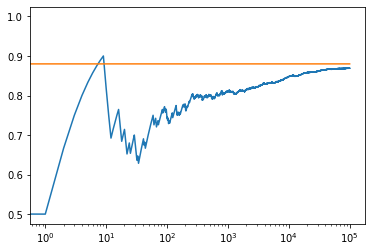

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.6217105263157895 actual prob 0.67
mean estimate: 0.854059609455293 actual prob 0.86
mean estimate: 0.03225806451612903 actual prob 0.09
mean estimate: 0.8023975251353443 actual prob 0.8
mean estimate: 0.452991452991453 actual prob 0.5
mean estimate: 0.1282051282051282 actual prob 0.19
mean estimate: 0.8802243487245079 actual prob 0.88
mean estimate: 0.808724832214765 actual prob 0.81
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 87095.0
overall win rate: 0.87095


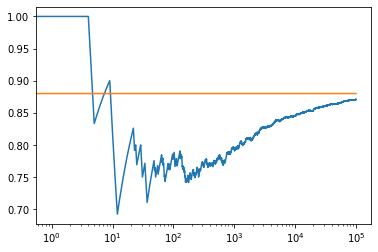

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.6883116883116884 actual prob 0.67
mean estimate: 0.8635432190760056 actual prob 0.86
mean estimate: 0.08333333333333333 actual prob 0.09
mean estimate: 0.7989309210526323 actual prob 0.8
mean estimate: 0.5126582278481012 actual prob 0.5
mean estimate: 0.10526315789473684 actual prob 0.19
mean estimate: 0.8784729939986651 actual prob 0.88
mean estimate: 0.8133771275007456 actual prob 0.81
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 86898.0
overall win rate: 0.86898


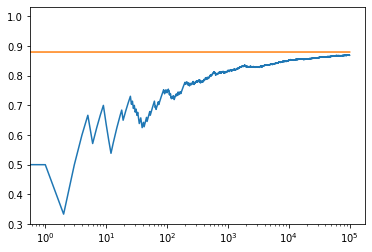

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.6871401151631478 actual prob 0.67
mean estimate: 0.8555976203353158 actual prob 0.86
mean estimate: 0.10810810810810811 actual prob 0.09
mean estimate: 0.7968197879858656 actual prob 0.8
mean estimate: 0.5473684210526312 actual prob 0.5
mean estimate: 0.21568627450980393 actual prob 0.19
mean estimate: 0.8810825386708501 actual prob 0.88
mean estimate: 0.8000827814569538 actual prob 0.81
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 87166.0
overall win rate: 0.87166


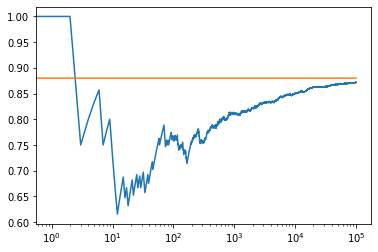

~~~~~~~~~~ print estimates ~~~~~~~~~~
mean estimate: 0.6643356643356644 actual prob 0.67
mean estimate: 0.8542630794572131 actual prob 0.86
mean estimate: 0.10526315789473684 actual prob 0.09
mean estimate: 0.8094451783355343 actual prob 0.8
mean estimate: 0.5566502463054186 actual prob 0.5
mean estimate: 0.23076923076923073 actual prob 0.19
mean estimate: 0.8798635831818942 actual prob 0.88
mean estimate: 0.8114935269971579 actual prob 0.81
~~~~~~~~~~ print total reward ~~~~~~~~~~
total reward earned: 87013.0
overall win rate: 0.87013


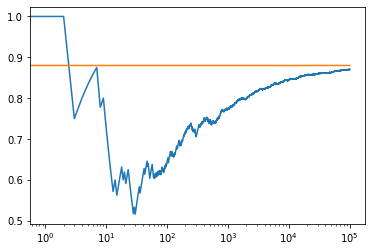

In [4]:
for i in range(5):

    experiment()

In [5]:
# Initial valueよりもそれぞれのbanditの確率を正しく計算している
# -> 逆に言えば、Initial valueよりも余計に不必要なbanditを計算している
# -> 概ねその通り